In [21]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
 
df = pd.read_csv("./data/wine.csv", index_col = 0)
 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
# scaler = StandardScaler()

qual = df['quality'] -3

scaler = MinMaxScaler()
 
col = df.columns

df = pd.DataFrame(scaler.fit_transform(df), columns = col)
df['quality'] = qual
df
 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,3
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,3
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,3
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,3
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.0,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.087558,0.150183,0.565891,0.202247,0.362319,2
6493,0.0,0.173554,0.313333,0.060241,0.024540,0.088040,0.131944,0.103687,0.154425,0.620155,0.303371,0.463768,3
6494,0.0,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.078341,0.166377,0.542636,0.297753,0.434783,3
6495,0.0,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.087558,0.161172,0.658915,0.275281,0.318841,2


<Axes: >

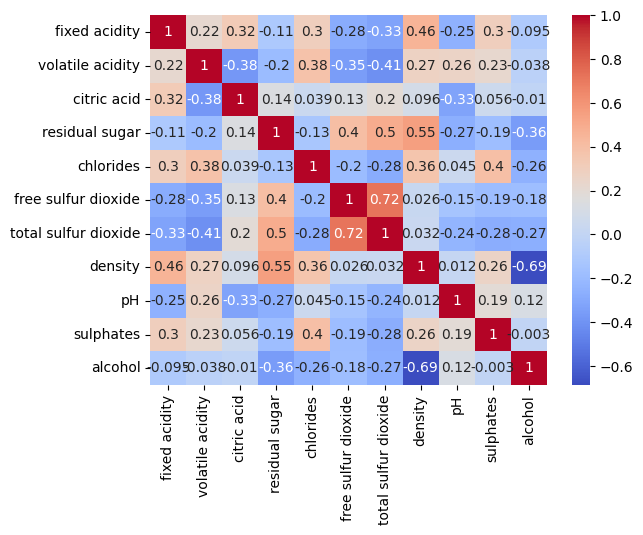

In [6]:
x= df.iloc[:,1:-1]
sns.heatmap(x.corr(), cmap = "coolwarm", annot = True)
#0.75~0.85 다중 공선성을 의심할 수 있다

In [8]:
from sklearn.decomposition import PCA, NMF

In [11]:
pca = PCA(n_components = 1)
temp = x[['free sulfur dioxide','total sulfur dioxide']]
reduced_temp = pd.DataFrame(pca.fit_transform(temp),columns = ['principal component'])
reduced_temp

,principal component
0,0.134706
1,0.014800
2,-0.041056
3,0.171651
4,0.171651
...,...
6492,-0.152871
6493,-0.129204
6494,-0.165170
6495,-0.152871


In [12]:
temp

,free sulfur dioxide,total sulfur dioxide
0,0.152778,0.377880
1,0.045139,0.290323
2,0.100694,0.209677
3,0.159722,0.414747
4,0.159722,0.414747
...,...,...
6492,0.107639,0.087558
6493,0.131944,0.103687
6494,0.097222,0.078341
6495,0.107639,0.087558


In [14]:
#모든 독립변수를 2개로 줄이기 ** 2차원으로 시각화 하기 위해서
pca = PCA(n_components =2)
reduced_df = pd.DataFrame(pca.fit_transform(x),columns=['principal component1','principal component2'])
reduced_df

,principal component1,principal component2
0,-0.381828,0.022863
1,-0.094222,-0.031821
2,-0.037175,-0.040346
3,-0.183011,0.099750
4,-0.183011,0.099750
...,...,...
6492,0.172154,-0.206463
6493,0.253566,-0.146174
6494,0.219417,-0.164152
6495,0.168212,-0.263376


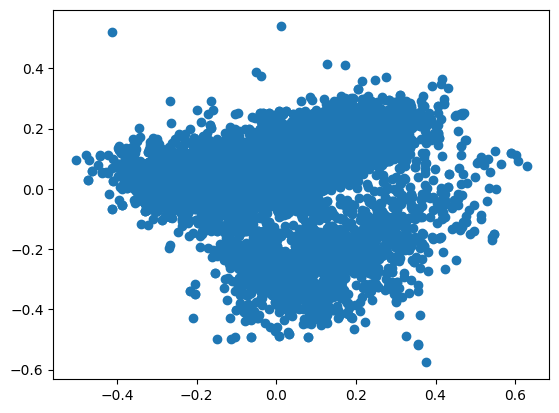

In [18]:
plt.scatter(reduced_df['principal component1'], reduced_df['principal component2'])

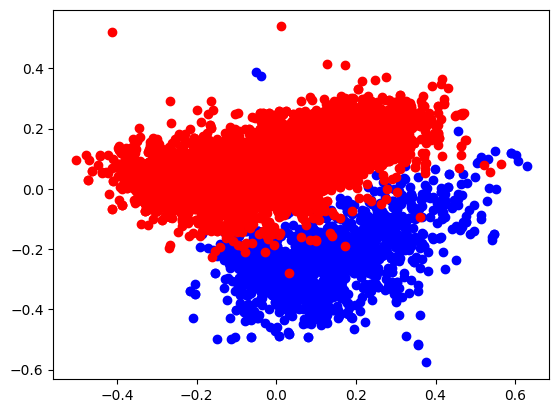

In [20]:
reduced_df['type'] = df['type']
color = ['blue','red']
for i in range(2):
    temp = reduced_df[reduced_df["type"] == i].reset_index(drop = True)
    plt.scatter(temp['principal component1'], temp['principal component2'], color = color[i])

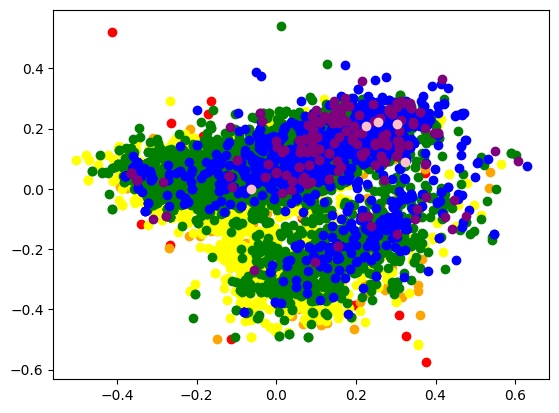

In [23]:
reduced_df['type'] = df['quality']
color = ['red','orange','yellow','green','blue','purple','pink']
for i in range(7):
    temp = reduced_df[reduced_df["type"] == i].reset_index(drop = True)
    plt.scatter(temp['principal component1'], temp['principal component2'], color = color[i])
#두개의 차원으로는 데이터를 충분히 설명하기 힘들다

In [25]:
#두개 차원으로는 부족하니 3개 차원으로 축소시켜보기
pca = PCA(n_components =3)
#설명할 수 잇는 분산이 높은 순으로 
reduced_df = pd.DataFrame(pca.fit_transform(x),columns=['principal component1','principal component2','principal component3'])
reduced_df

,principal component1,principal component2,principal component3
0,-0.381828,0.022863,-0.048485
1,-0.094222,-0.031821,0.105508
2,-0.037175,-0.040346,-0.036837
3,-0.183011,0.099750,0.030469
4,-0.183011,0.099750,0.030469
...,...,...,...
6492,0.172154,-0.206463,0.205789
6493,0.253566,-0.146174,0.231463
6494,0.219417,-0.164152,0.146894
6495,0.168212,-0.263376,0.279863


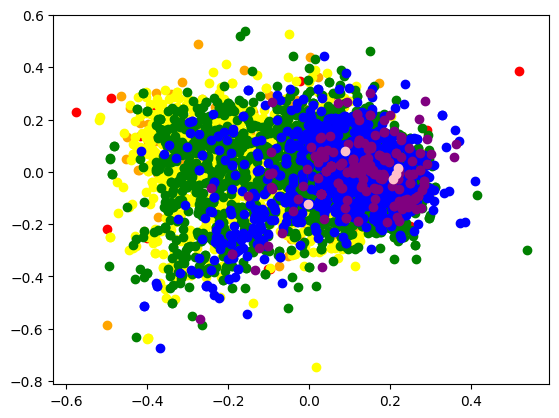

In [31]:
reduced_df['type'] = df['quality']
color = ['red','orange','yellow','green','blue','purple','pink']
for i in range(7):
    temp = reduced_df[reduced_df["type"] == i].reset_index(drop = True)
    plt.scatter(temp['principal component2'], temp['principal component3'], color = color[i])
#여전히 명확한 구분은 찾기 힘들다... 3개 차원도 부족해 보임.
#저퀄리티 와인에서는 특성 차이가 크게 없다

In [28]:
#차원 축소 시 분산의 크키 -> 남아 있는 정보량 
#0.7~0.8 정도의 정보량이 남아있는 걸 이상적으로 여김
pca.explained_variance_ratio_


array([0.3201497 , 0.23518497, 0.16199923])

In [33]:
#NMF
nmf = NMF(n_components =2) 
reduced_df = pd.DataFrame(nmf.fit_transform(x),columns=['principal component1','principal component2'])
reduced_df

,principal component1,principal component2
0,0.010470,0.143310
1,0.044926,0.084233
2,0.055316,0.081901
3,0.037892,0.115831
4,0.037892,0.115831
...,...,...
6492,0.080063,0.034777
6493,0.093353,0.030919
6494,0.087202,0.029954
6495,0.081492,0.044435


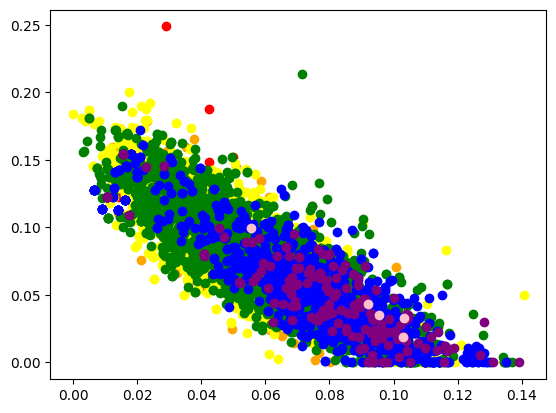

In [35]:
reduced_df['type'] = df['quality']
color = ['red','orange','yellow','green','blue','purple','pink']
for i in range(7):
    temp = reduced_df[reduced_df["type"] == i].reset_index(drop = True)
    plt.scatter(temp['principal component1'], temp['principal component2'], color = color[i])